# Projekt Eksploracja Dancyh

Zbiór danych podlegających analizie zawiera listę artykułów ze szczegółami. Głównym problemem jest sprawdzenie czy na podstawie dostarczonych informacji można dokonać klasyfikacji danego artykułu.

In [205]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

Na samym początku wszytujemy dane z pliku i usuwamy rekordy posiadajce przynajmniej jedną wartość NaN.

In [206]:
news = pd.read_csv('uci-news-aggregator.csv', sep=',')
news = data.dropna()

Wielkość zbioru danych to:

In [207]:
news.shape

(422417, 8)

Szczegóły artykułów są danymi jakościowymi (kategorycznymi) daltego zaczynami od ich skategoryzowania i zamiany danych tekstowych na wartości liczbowe.

In [208]:
news['TITLE'] = news['TITLE'].astype("category")
news['TITLE_CODE'] = news['TITLE'].cat.codes

news['URL'] = news['URL'].astype("category")
news['URL_CODE'] = news['URL'].cat.codes

news['PUBLISHER'] = news['PUBLISHER'].astype("category")
news['PUBLISHER_CODE'] = news['PUBLISHER'].cat.codes

news['CATEGORY'] = news['CATEGORY'].astype("category")
news['CATEGORY_CODE'] = news['CATEGORY'].cat.codes

news['STORY'] = news['STORY'].astype("category")
news['STORY_CODE'] = news['STORY'].cat.codes

news['HOSTNAME'] = news['HOSTNAME'].astype("category")
news['HOSTNAME_CODE'] = news['HOSTNAME'].cat.codes

Typy zmiennych po kategoryzacji:

In [209]:
news.dtypes

ID                   int64
TITLE             category
URL               category
PUBLISHER         category
CATEGORY          category
STORY             category
HOSTNAME          category
TIMESTAMP            int64
TITLE_CODE           int32
URL_CODE             int32
PUBLISHER_CODE       int16
CATEGORY_CODE         int8
STORY_CODE           int16
HOSTNAME_CODE        int16
dtype: object

Liczba unikalnych klas:

In [210]:
klasy = np.unique(news['CATEGORY'])
print (klasy)
print (len(klasy))

['b' 'e' 'm' 't']
4


Lista atrybutów:

In [211]:
print (news.columns)

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP', 'TITLE_CODE', 'URL_CODE', 'PUBLISHER_CODE',
       'CATEGORY_CODE', 'STORY_CODE', 'HOSTNAME_CODE'],
      dtype='object')


Parametry statystyczne dla poszczególnych kategorii:

In [212]:
news[news.CATEGORY =='b'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
count,115966.000000,115966,115966,115966,115966,115966,115966,1.159660e+05,115966.000000,115966.000000,115966.000000,115966.0,115966.000000,115966.000000
unique,NaN,111902,115919,6419,1,2019,6430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Posted by Imaduddin,http://business.financialpost.com/2014/07/03/c...,Reuters,b,drWjpn6_UzSkmiM_9qWYJe3-LIGPM,in.reuters.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,52,4,3157,115966,440,2286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,210546.310186,NaN,NaN,NaN,NaN,NaN,NaN,1.400444e+12,208958.484237,210771.774391,5390.938836,0.0,3705.070391,5982.413785
std,122424.698627,NaN,NaN,NaN,NaN,NaN,NaN,3.726124e+09,118329.597631,120377.316371,3115.303993,0.0,2085.739072,3066.959874
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394470e+12,3.000000,2.000000,0.000000,0.0,0.000000,2.000000
25%,101846.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.397291e+12,104520.250000,111412.250000,2856.000000,0.0,1856.000000,3759.000000
50%,211931.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.400369e+12,195966.500000,210789.500000,5240.000000,0.0,3814.000000,6073.000000
75%,311176.750000,NaN,NaN,NaN,NaN,NaN,NaN,1.403634e+12,324220.750000,315912.750000,8111.000000,0.0,5451.000000,8489.750000


In [213]:
news[news.CATEGORY =='e'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
count,152469.000000,152469,152469,152469,152469,152469,152469,1.524690e+05,152469.000000,152469.000000,152469.000000,152469.0,152469.000000,152469.000000
unique,NaN,146952,152387,6612,1,2075,6639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The article requested cannot be found! Please ...,http://www.latimes.com/local/lanow/la-me-ln-ra...,Contactmusic.com,e,dXfATHLvmd9iCUMfMSU3nmTZuv34M,www.contactmusic.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,130,4,2309,152469,387,2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,211261.873692,NaN,NaN,NaN,NaN,NaN,NaN,1.400419e+12,193538.831362,210337.832766,5455.535512,1.0,3533.920948,5935.496921
std,121905.693181,NaN,NaN,NaN,NaN,NaN,NaN,3.745640e+09,118612.215546,121494.261126,3172.921321,0.0,2060.172203,3081.798220
min,2170.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394517e+12,0.000000,0.000000,0.000000,1.0,2.000000,0.000000
25%,108956.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.397406e+12,85788.000000,106457.000000,2706.000000,1.0,1792.000000,3468.000000
50%,210088.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.399981e+12,202060.000000,202253.000000,5253.000000,1.0,3515.000000,5833.000000
75%,320453.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.403799e+12,290781.000000,313759.000000,8477.000000,1.0,5273.000000,8454.000000


In [214]:
news[news.CATEGORY =='m'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
count,45639.000000,45639,45639,45639,45639,45639,45639,4.563900e+04,45639.000000,45639.000000,45639.000000,45639.0,45639.000000,45639.000000
unique,NaN,43719,45615,5098,1,1347,5147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Share this on:,http://www.japantimes.co.jp/news/2014/04/18/wo...,Headlines \& Global News,m,dRL3APAAYdKPwuMnih--zAQtflluM,www.hngn.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9,5,381,45639,293,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,216210.545520,NaN,NaN,NaN,NaN,NaN,NaN,1.400552e+12,209926.907667,221357.465107,5710.064769,2.0,3592.327768,6280.847192
std,124515.779549,NaN,NaN,NaN,NaN,NaN,NaN,3.790449e+09,113575.274178,123269.973471,3122.279733,0.0,2077.584226,3146.897400
min,4208.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394548e+12,71.000000,152.000000,1.000000,2.0,6.000000,2.000000
25%,100603.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.397248e+12,110669.500000,108697.000000,3179.000000,2.0,1803.000000,3756.000000
50%,219209.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.400461e+12,221553.000000,230765.000000,5716.000000,2.0,3512.000000,6548.000000
75%,326432.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.403878e+12,310504.500000,324988.000000,8551.000000,2.0,5423.000000,9026.000000


In [215]:
news[news.CATEGORY =='t'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
count,108343.000000,108343,108343,108343,108343,108343,108343,1.083430e+05,108343.000000,108343.000000,108343.00000,108343.0,108343.000000,108343.000000
unique,NaN,104732,108305,6223,1,1789,6211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Business Wire,http://www.bizjournals.com/sanantonio/blog/mor...,Tech Times,t,dubwcJArLL_qAKML5LGPLiunKzNLM,www.techtimes.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,29,3,813,108343,450,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,211018.678530,NaN,NaN,NaN,NaN,NaN,NaN,1.400436e+12,207407.618628,208218.807786,5473.82296,3.0,3558.968138,5943.574287
std,120959.485833,NaN,NaN,NaN,NaN,NaN,NaN,3.697542e+09,115088.785346,123211.053542,3174.12785,0.0,2062.452915,3147.459672
min,945.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394494e+12,13.000000,12.000000,1.00000,3.0,1.000000,2.000000
25%,106124.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.397350e+12,121576.000000,98971.000000,2777.00000,3.0,1826.000000,3347.000000
50%,213506.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.400383e+12,210796.000000,207942.000000,5494.00000,3.0,3443.000000,6009.000000
75%,315876.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.403709e+12,307019.500000,316997.500000,8188.00000,3.0,5337.000000,8706.000000


In [216]:
news.describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
count,422417.000000,422417,422417,422417,422417,422417,422417,4.224170e+05,422417.000000,422417.000000,422417.000000,422417.000000,422417.00000,422417.000000
unique,NaN,406453,422221,10985,4,7230,11236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The article requested cannot be found! Please ...,http://www.japantimes.co.jp/news/2014/04/18/wo...,Reuters,e,dubwcJArLL_qAKML5LGPLiunKzNLM,in.reuters.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,145,5,3902,152469,450,2877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,211537.721735,NaN,NaN,NaN,NaN,NaN,NaN,1.400445e+12,203099.708170,211104.056548,5469.992221,1.346480,3593.64116,5987.761219
std,122102.335976,NaN,NaN,NaN,NaN,NaN,NaN,3.733077e+09,117324.499131,121881.208206,3153.321520,1.135104,2070.88842,3103.523199
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394470e+12,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,105803.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.397349e+12,101420.000000,105575.000000,2777.000000,0.000000,1813.00000,3516.000000
50%,211656.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.399990e+12,203065.000000,211096.000000,5380.000000,1.000000,3588.00000,6050.000000
75%,317274.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.403775e+12,304642.000000,316651.000000,8274.000000,3.000000,5361.00000,8631.000000


Najwiecej jest próbek kategorii e.

# Korealcja Pearsona

In [217]:
pearson_matrix = news.corr("pearson")
pearson_matrix

,ID,TIMESTAMP,TITLE_CODE,URL_CODE,PUBLISHER_CODE,CATEGORY_CODE,STORY_CODE,HOSTNAME_CODE
ID,1.000000,0.990535,-0.006448,0.003379,-0.005788,0.003685,-0.018395,-0.006561
TIMESTAMP,0.990535,1.000000,-0.005978,0.002943,-0.005219,0.001765,-0.017385,-0.006558
TITLE_CODE,-0.006448,-0.005978,1.000000,0.003630,0.014469,0.010055,-0.010624,0.006756
URL_CODE,0.003379,0.002943,0.003630,1.000000,0.438070,-0.002031,0.006460,0.951129
PUBLISHER_CODE,-0.005788,-0.005219,0.014469,0.438070,1.000000,0.013859,0.007814,0.393731
CATEGORY_CODE,0.003685,0.001765,0.010055,-0.002031,0.013859,1.000000,-0.020640,0.002971
STORY_CODE,-0.018395,-0.017385,-0.010624,0.006460,0.007814,-0.020640,1.000000,0.006374
HOSTNAME_CODE,-0.006561,-0.006558,0.006756,0.951129,0.393731,0.002971,0.006374,1.000000


Wykres korelacji atrybutów:

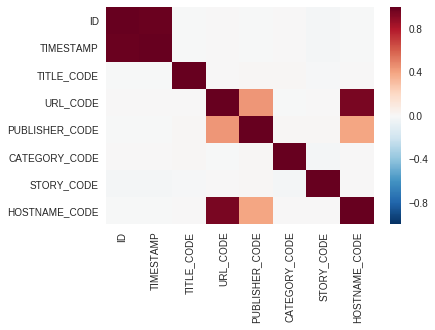

In [218]:
sns.heatmap(pearson_matrix)
sns.plt.show()

Jak pokazuje powyższy wykres, otrzymane dane są od siebie praktycznie całkowicie niezależne. Występują oczywiście pary współczynników mocno skorelowanych z których wybieramy tylko jedną wartość. Analizując poziom korelacji pomiędzy atrybutami możemy zauważyć że jedynym możliwym elementem analizy jest zależność Wydawcy (PUBLISHER) od adresu URL artykułu. Pozostałe atrybuty są od siebie całkowicie niezależne.

In [226]:
cechy = ['CATEGORY','URL_CODE', 'PUBLISHER_CODE']
news2 = news[cechy].copy()
news2

,CATEGORY,URL_CODE,PUBLISHER_CODE
0,b,265373,5030
1,b,271217,4975
2,b,238996,3918
3,b,238738,3918
4,b,283535,5524
5,b,291269,5732
6,b,275697,5216
7,b,210573,2861
8,b,25227,2589
9,b,239761,4131


# Klasyfikacja: Metoda najbliższego sąsiada (k-NN)

Podział danych testowych:

In [233]:
# załadowanie odpowiednich modułów
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(news2.iloc[:,1:2], news2.CATEGORY, test_size=0.3, random_state=1)
print ('Dlugosc X_train: ', len(X_train))
print ('Dlugosc X_test: ', len(X_test))
print ('Dlugosc y_train: ', len(y_train))
print ('Dlugosc y_test: ', len(y_test))

Dlugosc X_train:  295691
Dlugosc X_test:  126726
Dlugosc y_train:  295691
Dlugosc y_test:  126726


Dobranie liczby sąsiadów poprzez analizę błędu klasyfikacji dla różnych wartości sąsiadów:

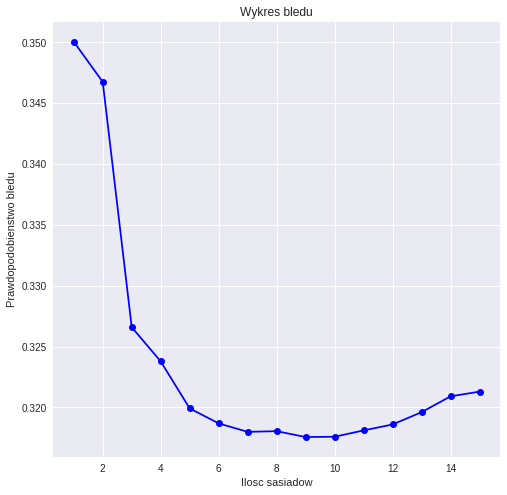

In [234]:
kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rss_all[k-1] = 1 - model.score(X_test,y_test)
plt.figure(figsize=(8, 8))
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Ilosc sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

Z wykresu wynika że najlepsza ilość sąsiadów to 10.

In [237]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
knn_prediction = model.predict(X_test) 
print ("Trafność " + str(model.score(X_test,y_test) * 100) + "%")

Trafność 68.241718353%
